<a href="https://colab.research.google.com/github/merine-j/machinelearning_projects/blob/master/Used_carprice_ML_Proj3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install skfeature-chappers

**Imporing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest,mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

**Data Loading**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data set/car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
org_df=df.copy()

In [ ]:
df['Car_Age']=2023-df['Year']

In [ ]:
df.drop('Year',axis=1,inplace=True)
df

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


**EDA**

In [ ]:
df.describe(include='all')

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
count,301,301.000000,301.000000,301.000000,301,301,301,301.000000,301.000000
unique,98,NaN,NaN,NaN,3,2,2,NaN,NaN
top,city,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN,NaN
freq,26,NaN,NaN,NaN,239,195,261,NaN,NaN
mean,NaN,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189,9.372093
std,NaN,5.082812,8.642584,38886.883882,NaN,NaN,NaN,0.247915,2.891554
min,NaN,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000,5.000000
25%,NaN,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000,7.000000
50%,NaN,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000,9.000000
75%,NaN,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000,11.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Driven_kms     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Selling_type   301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Car_Age        301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


*Data Visualization*

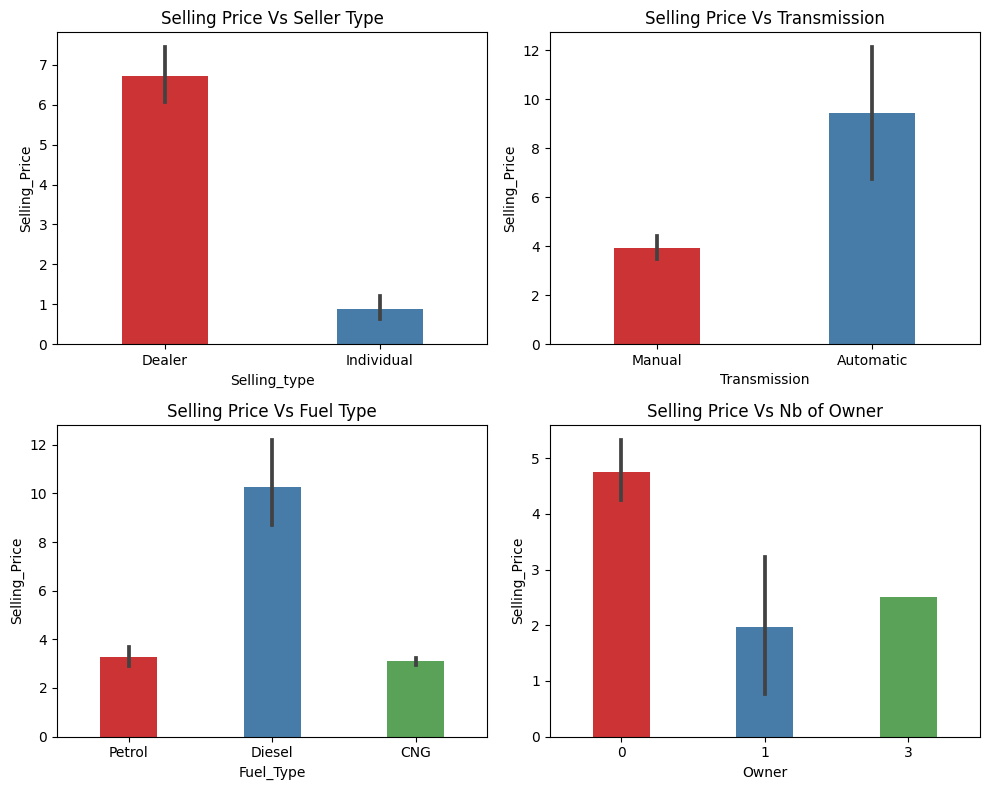

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.barplot(data=df,x='Selling_type',y='Selling_Price',width=0.4,palette='Set1')
plt.title('Selling Price Vs Seller Type')

plt.subplot(2,2,2)
sns.barplot(data=df,x='Transmission',y='Selling_Price',width=0.4,palette='Set1')
plt.title('Selling Price Vs Transmission')

plt.subplot(2,2,3)
sns.barplot(data=df,x='Fuel_Type',y='Selling_Price',width=0.4,palette='Set1')
plt.title('Selling Price Vs Fuel Type')

plt.subplot(2,2,4)
sns.barplot(data=df,x='Owner',y='Selling_Price',width=0.4,palette='Set1')
plt.title('Selling Price Vs Nb of Owner')
plt.tight_layout()
plt.show()

observations


*   Selling price is high when sold by dealers compared to individuals.
*   Automatic cars have higher selling price.

*   Cars with fuel type diesel have higher selling price than petrol and CNG.
*   Less owners used cars have high selling price.





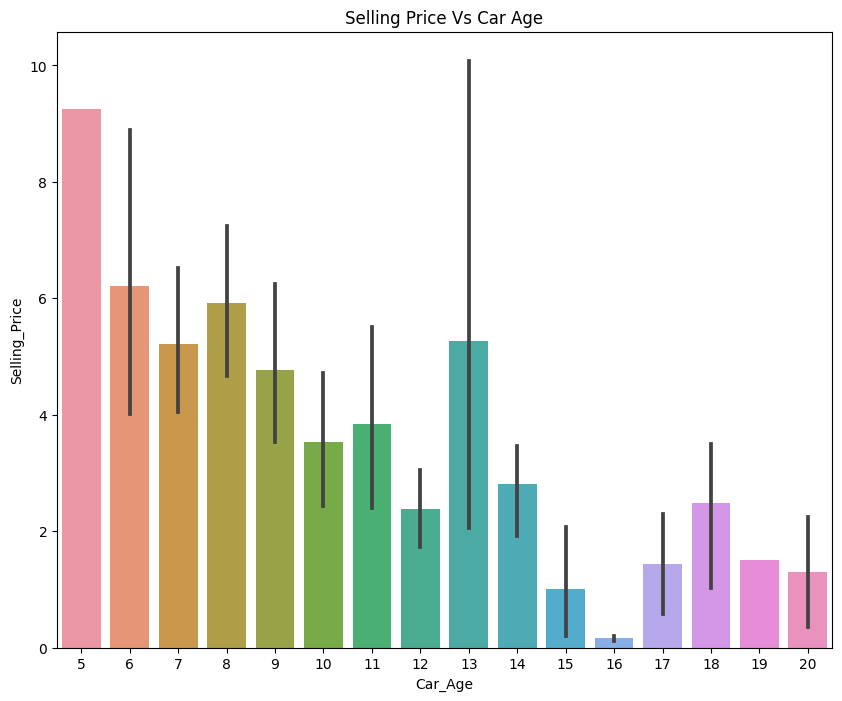

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=df,x='Car_Age',y='Selling_Price')
plt.title('Selling Price Vs Car Age')
plt.show()

observations


*   Cars below 10 years old have most demand.
*   14 and above aged cars have low selling price.



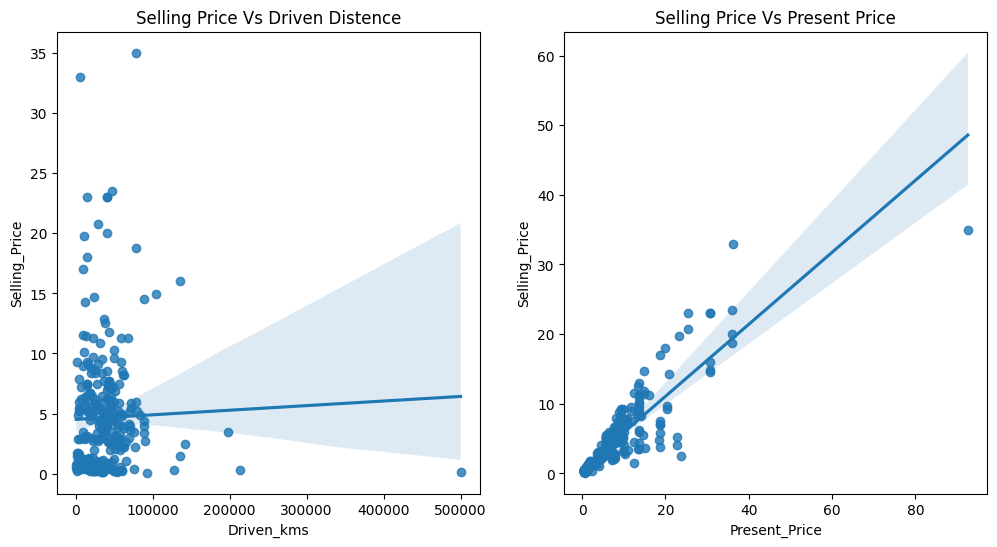

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.regplot(data=df,x='Driven_kms',y='Selling_Price')
plt.title('Selling Price Vs Driven Distence')

plt.subplot(1,2,2)
sns.regplot(data=df,x='Present_Price',y='Selling_Price')
plt.title('Selling Price Vs Present Price')
plt.show()

Observations


*   Lesser the driven distance,higher the selling price.
*   Selling price increases with increase in present price.



In [ ]:
df.isna().sum()

Car_Name         0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
Car_Age          0
dtype: int64

In [ ]:
df.dtypes

Car_Name          object
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
Car_Age            int64
dtype: object

In [ ]:
df.drop('Car_Name',axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
catg=['Fuel_Type','Selling_type','Transmission']
for i in catg:
  df[i]=le.fit_transform(df[i])m

In [ ]:
df.head()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,2,0,1,0,9
1,4.75,9.54,43000,1,0,1,0,10
2,7.25,9.85,6900,2,0,1,0,6
3,2.85,4.15,5200,2,0,1,0,12
4,4.60,6.87,42450,1,0,1,0,9


In [ ]:
X=df.iloc[:,:-1]
X

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,3.35,5.59,27000,2,0,1,0
1,4.75,9.54,43000,1,0,1,0
2,7.25,9.85,6900,2,0,1,0
3,2.85,4.15,5200,2,0,1,0
4,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...
296,9.50,11.60,33988,1,0,1,0
297,4.00,5.90,60000,2,0,1,0
298,3.35,11.00,87934,2,0,1,0
299,11.50,12.50,9000,1,0,1,0


In [ ]:
y=df.iloc[:,-1]
y

0       9
1      10
2       6
3      12
4       9
       ..
296     7
297     8
298    14
299     6
300     7
Name: Car_Age, Length: 301, dtype: int64

**feature selection**

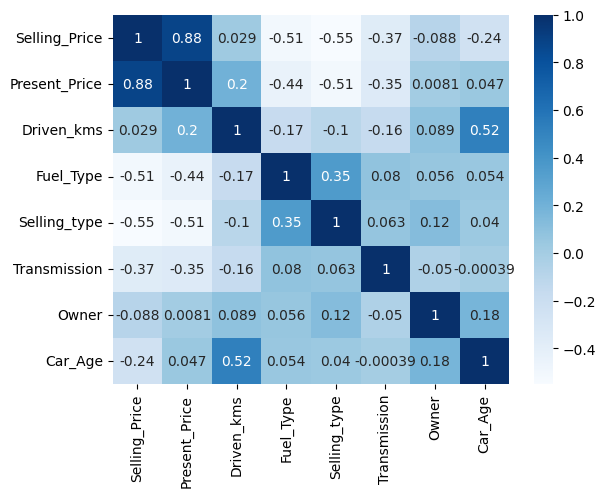

In [ ]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show()

[0.26280181 0.15396599 0.32001938 0.02078059 0.03785291 0.
 0.02072946]


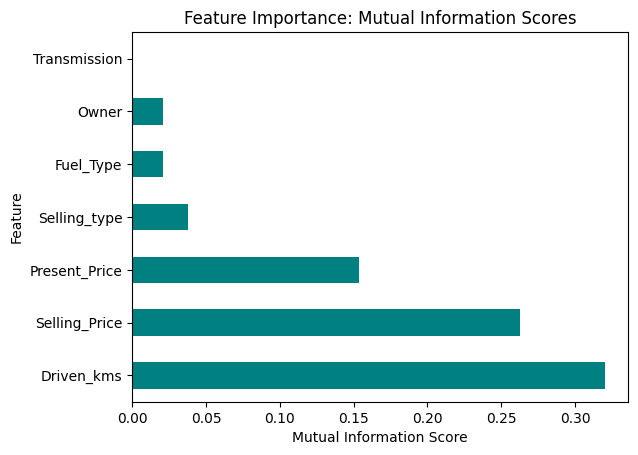

In [ ]:
fea=SelectKBest(mutual_info_regression,k=4)
X_new=fea.fit_transform(X,y)
scores=fea.scores_
print(scores)
scores_vis=pd.Series(scores,index=X.columns)
scores_vis.sort_values(ascending=False).plot(kind='barh',color='teal')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.title('Feature Importance: Mutual Information Scores')
plt.show()

Scaling

In [ ]:
ss=StandardScaler()
X_new=ss.fit_transform(X_new)

Training and Testing

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=1)

**model creating**

In [ ]:
gbr=GradientBoostingRegressor(n_estimators=100,criterion='friedman_mse',random_state=1)
gbr.fit(X_new,y)
y_new=gbr.predict(X_test)
y_new

array([ 7.18376063,  9.31550822,  9.54071241,  7.88847787,  8.18499094,
        6.61013871,  6.40670598, 10.56353031,  7.92847743,  8.8858594 ,
        6.74202434,  9.89145547,  7.45561245,  8.8604805 , 15.42274738,
        8.29388912,  9.19528715,  9.18903048,  9.89797455,  8.50417899,
        6.80434551, 11.73760997, 12.48485047,  7.30322555, 17.5882158 ,
        8.51061227, 14.99879363,  8.34863427, 10.46642782, 11.33991806,
        9.22334179, 12.14856434,  8.67451719,  7.97567746,  7.97567746,
        8.56048979,  9.384667  ,  7.68943416, 11.48471207,  8.85207211,
        8.09970314,  7.33175274, 11.87243976,  8.8604805 ,  9.46919482,
        9.384667  ,  8.7771616 ,  8.52198439,  7.99831061,  8.35541678,
        9.16296161,  6.81807281,  9.49536993,  8.78513542,  8.29640642,
       16.10748547, 10.0972905 ,  9.2773203 ,  8.83705303,  7.67909175,
       11.48651965,  6.67883684,  7.0538826 , 10.26424326, 10.98495271,
        7.72547943, 18.50787146,  9.03774234, 14.50670134, 11.10

In [ ]:
r2score=r2_score(y_test,y_new)
print('r2score : ',r2score)
mae=mean_absolute_error(y_test,y_new)
print('mean absolute error : ',mae)
mse=mean_squared_error(y_test,y_new)
print('mean squared error : ',mse)
rmse=np.sqrt(mean_squared_error(y_test,y_new))
print('root mean squared error : ',rmse)

r2score :  0.9004920292280691
mean absolute error :  0.7117637370103931
mean squared error :  0.7815719641284777
root mean squared error :  0.884065588137259
